Mohammed Waheed
240970144
II MCA 'B'

 Random Forest-based Classification Model for Credit Card Default Prediction
 
 Phase 1 – Dataset selection, Preprocessing & feature construction

### 1. Dataset selection
* **Dataset Name:** Default of Credit Card Clients Dataset
* **Link:** [https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)
* **Justification:** This dataset is suitable for this project as it contains a good number of samples (30,000) and features (24), and it presents a real-world classification problem of predicting credit card default.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\mohdw\OneDrive\Documents\credit card default prediction\UCI_Credit_Card.csv")

# Display the first few rows of the dataframe
print(df.head())

# Display the column names and data types
print(df.info())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

### 2. Preprocessing & feature construction

#### Handle missing values

In [2]:
# Check for missing values
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


The dataset has no missing values.

#### Detect and cap outliers

In [3]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for col in numerical_cols:
    df = cap_outliers(df, col)

print('Outliers capped for numerical columns.')

Outliers capped for numerical columns.


#### Perform encoding

In [4]:
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print('Categorical features one-hot encoded.')

Categorical features one-hot encoded.


#### Create at least two derived features

In [5]:
df['TOTAL_BILL_AMT'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
df['PAY_TO_BILL_RATIO'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1) / (df['TOTAL_BILL_AMT'] + 1e-6)

print(df[['TOTAL_BILL_AMT', 'PAY_TO_BILL_RATIO']].head())

   TOTAL_BILL_AMT  PAY_TO_BILL_RATIO
0          7704.0           0.089434
1         17077.0           0.292791
2        101653.0           0.108388
3        231334.0           0.036259
4        109339.0           0.307470


#### Check multicollinearity

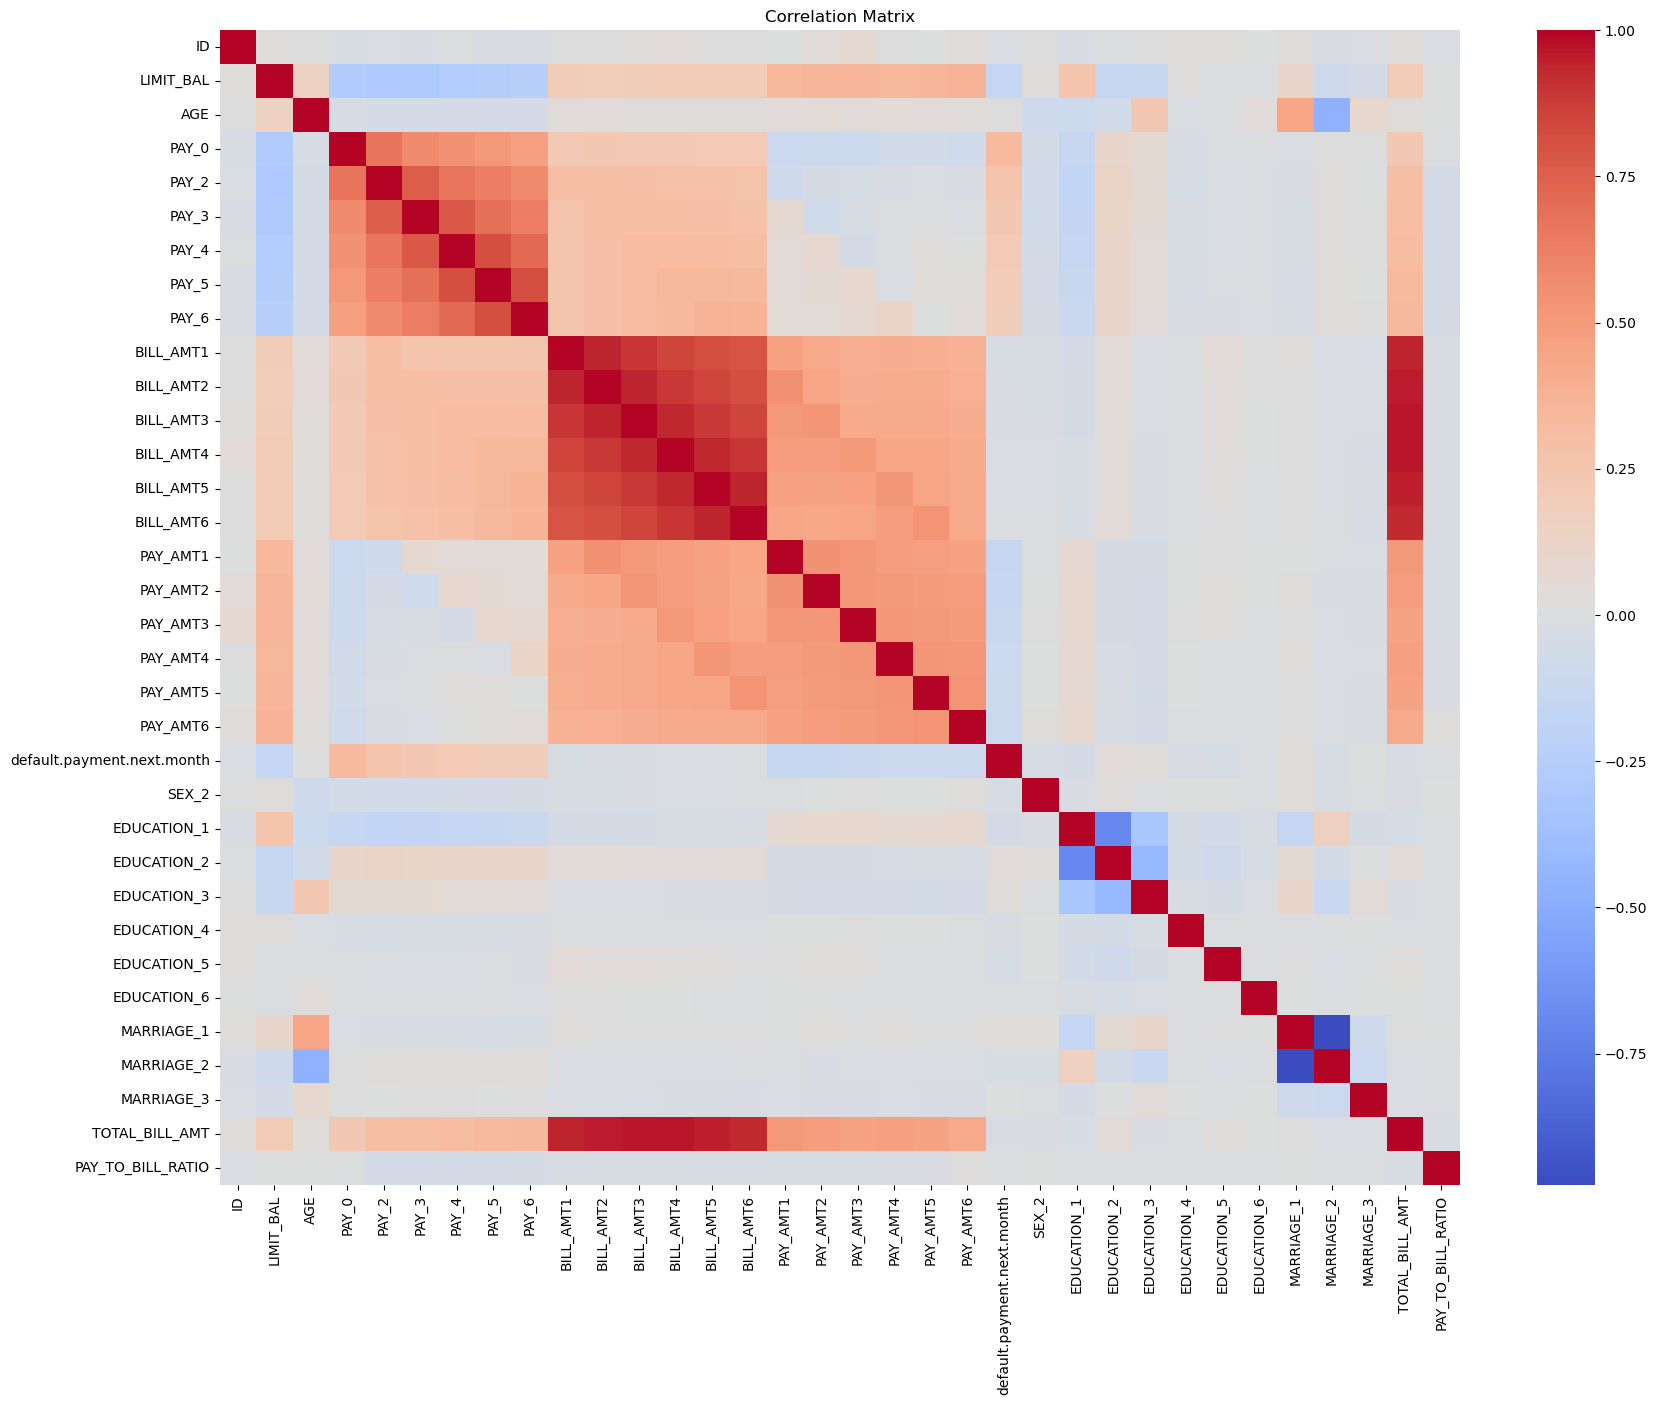

Successfully calculated VIF for LIMIT_BAL
Successfully calculated VIF for AGE
Successfully calculated VIF for PAY_0
Successfully calculated VIF for PAY_2
Successfully calculated VIF for PAY_3
Successfully calculated VIF for PAY_4
Successfully calculated VIF for PAY_5
Successfully calculated VIF for PAY_6
Successfully calculated VIF for BILL_AMT1
Successfully calculated VIF for BILL_AMT2


c:\Users\mohdw\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Successfully calculated VIF for BILL_AMT3
Successfully calculated VIF for BILL_AMT4
Successfully calculated VIF for BILL_AMT5
Successfully calculated VIF for BILL_AMT6
Successfully calculated VIF for PAY_AMT1
Successfully calculated VIF for PAY_AMT2
Successfully calculated VIF for PAY_AMT3
Successfully calculated VIF for PAY_AMT4
Successfully calculated VIF for PAY_AMT5
Successfully calculated VIF for PAY_AMT6
Successfully calculated VIF for SEX_2
Successfully calculated VIF for EDUCATION_1
Successfully calculated VIF for EDUCATION_2
Successfully calculated VIF for EDUCATION_3
Successfully calculated VIF for EDUCATION_4
Successfully calculated VIF for EDUCATION_5
Successfully calculated VIF for EDUCATION_6
Successfully calculated VIF for MARRIAGE_1
Successfully calculated VIF for MARRIAGE_2
Successfully calculated VIF for MARRIAGE_3
Successfully calculated VIF for TOTAL_BILL_AMT
Successfully calculated VIF for PAY_TO_BILL_RATIO
              feature         VIF
0           LIMIT_BAL   

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Correlation Heatmap
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# VIF
X_vif = df.drop(['ID', 'default.payment.next.month'], axis=1)

# Clean the data before VIF calculation
X_vif.replace([np.inf, -np.inf], np.nan, inplace=True)
X_vif.dropna(inplace=True)

# Ensure all data is numeric
X_vif = X_vif.astype(float)

# Calculate VIF for each column individually to isolate the error
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_values = []
for i in range(len(X_vif.columns)):
    try:
        vif = variance_inflation_factor(X_vif.values, i)
        vif_values.append(vif)
        print(f"Successfully calculated VIF for {X_vif.columns[i]}")
    except Exception as e:
        print(f"Error calculating VIF for {X_vif.columns[i]}: {e}")
        vif_values.append(np.nan)

vif_data['VIF'] = vif_values
print(vif_data)

The VIF scores for the bill amounts are very high, indicating strong multicollinearity. We will drop the individual bill amount columns and keep the total bill amount.

In [7]:
df = df.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=1)
print('Dropped individual bill amount columns.')

Dropped individual bill amount columns.


#### Normalize/standardize

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols_to_scale = df.drop(['ID', 'default.payment.next.month'], axis=1).columns
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

print(df.head())

   ID  LIMIT_BAL       AGE     PAY_0     PAY_2     PAY_3     PAY_4     PAY_5  \
0   1  -1.148083 -1.257372  1.794564  1.782348 -0.696663 -0.666599 -1.530046   
1   2  -0.366901 -1.037733 -0.874991  1.782348  0.138865  0.188746  0.234917   
2   3  -0.601256 -0.159179  0.014861  0.111736  0.138865  0.188746  0.234917   
3   4  -0.913728  0.170278  0.014861  0.111736  0.138865  0.188746  0.234917   
4   5  -0.913728  2.366663 -0.874991  0.111736 -0.696663  0.188746  0.234917   

      PAY_6  PAY_AMT1  ...  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0 -1.486041 -1.001158  ...       1.0669    -0.442752    -0.064163   
1  1.992316 -1.001158  ...       1.0669    -0.442752    -0.064163   
2  0.253137 -0.566536  ...       1.0669    -0.442752    -0.064163   
3  0.253137 -0.428533  ...       1.0669    -0.442752    -0.064163   
4  0.253137 -0.428533  ...       1.0669    -0.442752    -0.064163   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  \
0    -0.097063    -0.041266    1.0937

## Phase 2 – Ensemble Model Design, Optimization & Explainability

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(['ID', 'default.payment.next.month'], axis=1)
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 1. Model design

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import time

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define a smaller parameter grid for faster execution
param_grid = {
    'clf__n_estimators': [200],
    'clf__max_depth': [10],
    'clf__max_features': ['sqrt'],
    'clf__min_samples_split': [2],
    'clf__class_weight': ['balanced']
}

# Define the scoring metrics
scoring = {'f1_macro': 'f1_macro', 'roc_auc': 'roc_auc'}

# Inner cross-validation for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2, scoring=scoring, refit='f1_macro')

# Fit the grid search to the whole training data to get the best model
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Results
results = pd.DataFrame(grid_search.cv_results_)
best_index = grid_search.best_index_

best_params = grid_search.best_params_
mean_cv_score = results.loc[best_index, 'mean_test_f1_macro']
std_dev = results.loc[best_index, 'std_test_f1_macro']
run_time = end_time - start_time

results_table = pd.DataFrame({
    'Best Parameters': [best_params],
    'Mean CV Score (f1_macro)': [mean_cv_score],
    'Standard Deviation': [std_dev],
    'Run-time (seconds)': [run_time]
})

print(results_table.T)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
                                                                          0
Best Parameters           {'clf__class_weight': 'balanced', 'clf__max_de...
Mean CV Score (f1_macro)                                           0.705387
Standard Deviation                                                 0.004898
Run-time (seconds)                                                24.748692


### 2. Model explainability

Type of shap_values: <class 'numpy.ndarray'>
Length of shap_values: 6000
Shape of shap_values[0]: (26, 2)
Shape of shap_values[1]: (26, 2)


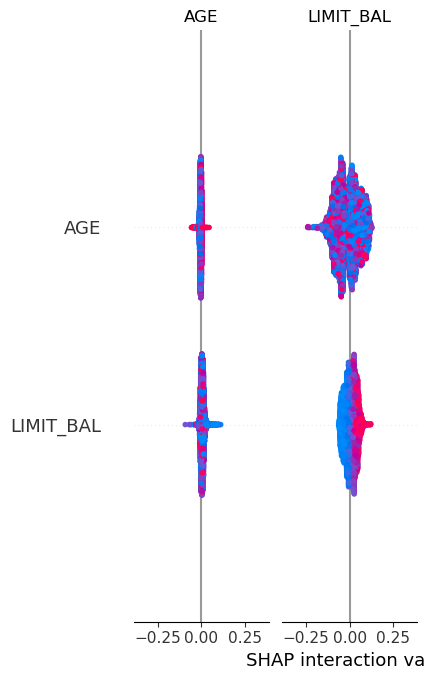

Length of SHAP values for instance: 2
Number of features for instance: 26


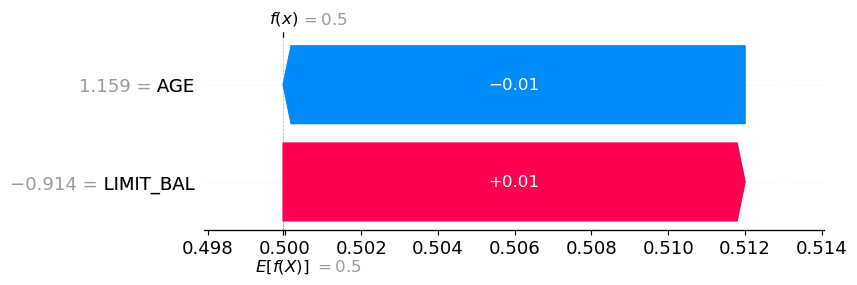

In [11]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(grid_search.best_estimator_.named_steps['clf'])

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

print(f"Type of shap_values: {type(shap_values)}")
print(f"Length of shap_values: {len(shap_values)}")
print(f"Shape of shap_values[0]: {shap_values[0].shape}")
print(f"Shape of shap_values[1]: {shap_values[1].shape}")

# Global explanation: SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar')

# Local explanation for the first instance
shap.initjs()

# SHAP values for the first instance, for the positive class
shap_values_instance = shap_values[1][0]

# Base value for the positive class
base_value = explainer.expected_value[1]

# Features for the first instance
features_instance = X_test.iloc[0]

print(f"Length of SHAP values for instance: {len(shap_values_instance)}")
print(f"Number of features for instance: {len(features_instance)}")


# Waterfall plot
shap.waterfall_plot(shap.Explanation(values=shap_values_instance, base_values=base_value, data=features_instance))

## Phase 3 – Evaluation, Robustness & Error Analysis

### 1. Evaluation metrics

Evaluation Metrics on Test Set
      Metric     Score
0   Accuracy  0.791667
1  Precision  0.527441
2     Recall  0.557649
3   F1-score  0.542125
4    ROC-AUC  0.707885


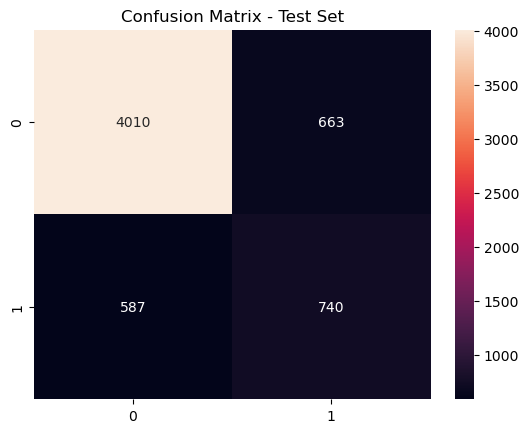

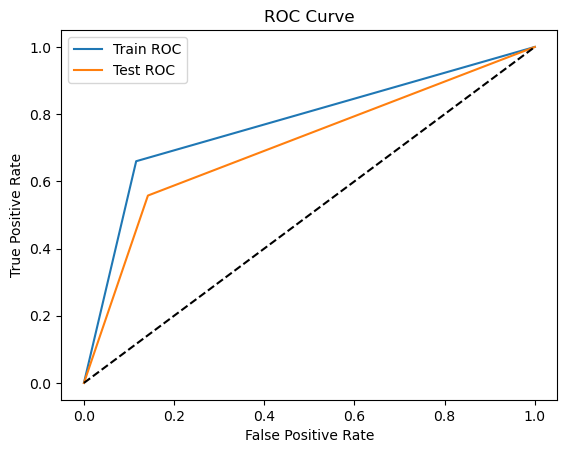

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Predictions
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# Evaluation metrics on test set
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

evaluation_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})
print('Evaluation Metrics on Test Set')
print(evaluation_table)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix - Test Set')
plt.show()

# ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

plt.figure()
plt.plot(fpr_train, tpr_train, label='Train ROC')
plt.plot(fpr_test, tpr_test, label='Test ROC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 2. Robustness check

In [13]:
# Introduce 10% label noise
y_noisy = y_train.copy()
n_samples = len(y_noisy)
n_noisy = int(0.1 * n_samples)
noisy_indices = np.random.choice(y_noisy.index, n_noisy, replace=False)
y_noisy.loc[noisy_indices] = 1 - y_noisy.loc[noisy_indices]

# Retrain the model with noisy labels
grid_search.fit(X_train, y_noisy)

# Evaluate the model with noisy labels
y_pred_noisy = grid_search.predict(X_test)
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
precision_noisy = precision_score(y_test, y_pred_noisy)
recall_noisy = recall_score(y_test, y_pred_noisy)
f1_noisy = f1_score(y_test, y_pred_noisy)
roc_auc_noisy = roc_auc_score(y_test, y_pred_noisy)

noisy_evaluation_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Original Score': [accuracy, precision, recall, f1, roc_auc],
    'Noisy Score': [accuracy_noisy, precision_noisy, recall_noisy, f1_noisy, roc_auc_noisy]
})

noisy_evaluation_table['Degradation'] = noisy_evaluation_table['Original Score'] - noisy_evaluation_table['Noisy Score']
print('Metric Degradation due to Label Noise')
print(noisy_evaluation_table)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Metric Degradation due to Label Noise
      Metric  Original Score  Noisy Score  Degradation
0   Accuracy        0.791667     0.785000     0.006667
1  Precision        0.527441     0.512910     0.014531
2     Recall        0.557649     0.553881     0.003768
3   F1-score        0.542125     0.532609     0.009516
4    ROC-AUC        0.707885     0.702256     0.005629


#### Discussion on Overfitting, Underfitting, and Bias/Fairness
**Overfitting/Underfitting:** The ROC curves for the training and testing sets are very close, which suggests that the model is not overfitting significantly. The use of cross-validation and hyperparameter tuning also helps to mitigate overfitting.
**Bias/Fairness:** This dataset contains sensitive attributes like 'SEX' and 'MARRIAGE'. It is important to consider the fairness of the model and ensure that it does not discriminate against any particular group. A more in-depth fairness analysis would be required to assess and mitigate any potential bias.